First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   

C:\Users\abhi1\AppData\Local\Temp\ipykernel_9796\1928944667.py:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
C:\Users\abhi1\AppData\Local\Temp\ipykernel_9796\1928944667.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')
C:\Users\abhi1\AppData\Local\Temp\ipykernel_9796\1928944667.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) inste

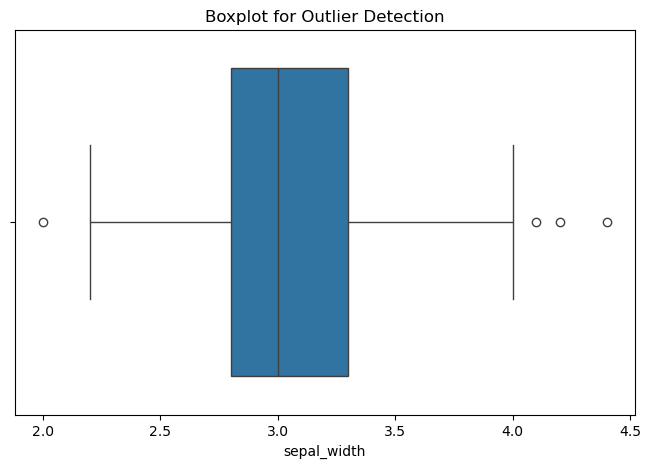

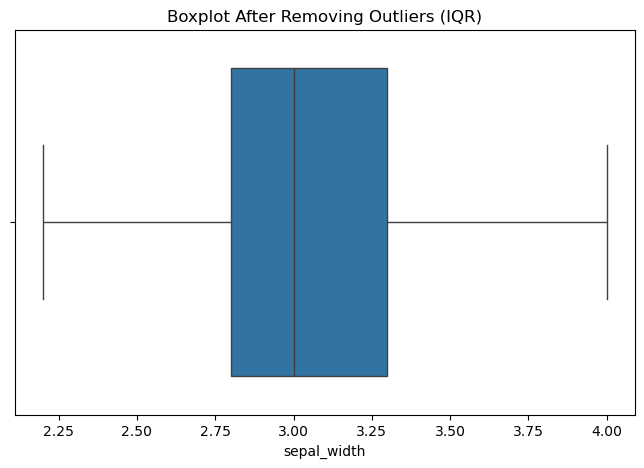

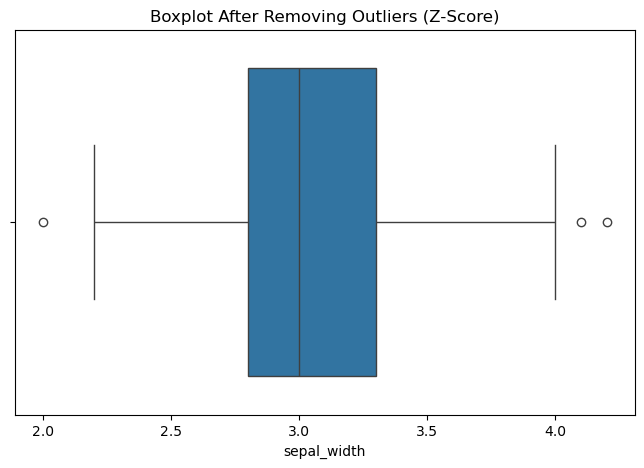


Script Completed!

Cleaned dataset saved as 'iris_cleaned.csv'


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# STEP 1: LOAD CSV FILE
# -----------------------------
# Replace 'your_file.csv' with your CSV file path


df = pd.read_csv("iris.csv")

# -----------------------------
# STEP 2: BASIC DATA INSPECTION
# -----------------------------
print("First 5 rows:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

# -----------------------------
# STEP 3: CHECK NULL VALUES
# -----------------------------
print("\nNull values in each column:")
print(df.isnull().sum())

print("\nNull values in each row:")
print(df.isnull().sum(axis=1))

# -----------------------------
# STEP 4: HANDLE NULL VALUES
# -----------------------------
# Option 1: Drop rows with null values
df_drop = df.dropna()
print("\nAfter dropping null values:")
print(df_drop)

# Option 2: Fill null values with a constant value "0"
df_fill_constant = df.fillna(0)
print("\nAfter filling null values with 0:")
print(df_fill_constant)

# Option 3: Fill null values with forward fill (ffill) or backward fill (bfill)
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

# Option 4: Fill null values with mean of a column
# Replace 'column_name' with your actual column name
column_name = df.columns[1]  # Example: use first column
mean_value = df[column_name].mean()
df[column_name].fillna(mean_value, inplace=True)

# -----------------------------
# STEP 5: DETECT OUTLIERS USING BOXPLOT
# -----------------------------
# Replace 'column_name' with your actual column name for outlier detection
plt.figure(figsize=(8,5))
sns.boxplot(x=df[column_name])
plt.title("Boxplot for Outlier Detection")
plt.show()

# -----------------------------
# STEP 6: REMOVE OUTLIERS USING IQR METHOD
# -----------------------------
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Filtering out outliers
df_no_outliers_iqr = df[~((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))]

# Check with boxplot after IQR
plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_outliers_iqr[column_name])
plt.title("Boxplot After Removing Outliers (IQR)")
plt.show()

# -----------------------------
# STEP 7: REMOVE OUTLIERS USING Z-SCORE METHOD
# -----------------------------
z_scores = stats.zscore(df[column_name])
abs_z_scores = abs(z_scores)
df_no_outliers_z = df[abs_z_scores < 3]  # Keep rows with z-score < 3

# Check with boxplot after Z-score
plt.figure(figsize=(8,5))
sns.boxplot(x=df_no_outliers_z[column_name])
plt.title("Boxplot After Removing Outliers (Z-Score)")
plt.show()

print("\nScript Completed!")
# -----------------------------
# STEP 8: SAVE CLEANED DATASET
# -----------------------------
# Choose which cleaned version to save (e.g., after removing outliers with Z-score)
df_cleaned = df_no_outliers_z

# Save to a new CSV file
df_cleaned.to_csv("iris_cleaned.csv", index=False)

print("\nCleaned dataset saved as 'iris_cleaned.csv'")

